In [1]:
%matplotlib inline

import copy
from datetime import date
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys
import time
import torch as pt

sys.path.insert(0, '../..')

from function_space import DenseNet, DenseNet_tanh
from problems import ExponentialOnBallNonlinearSin
from solver import EllipticSolver
from utilities import plot_loss_logs_extended, plot_moving_average

%load_ext autoreload
%autoreload 2

device = pt.device('cuda')

## First tune the different losses

## PINN loss

In [2]:
d = 50
L = 220000
print_every = 500
delta_t = 0.001
N = 20

problem = ExponentialOnBallNonlinearSin(d=d)

models_pinn = [EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[0.001, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
         EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[0.0001, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
         EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[0.00001, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
         EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[0.001, 1.0], adaptive_forward_process=False, detach_forward=True, uniform_square=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
         EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[0.0001, 1.0], adaptive_forward_process=False, detach_forward=True, uniform_square=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
         EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[0.00001, 1.0], adaptive_forward_process=False, detach_forward=True, uniform_square=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN')]

for model in models_pinn:
    model.V = DenseNet(d, 1, 0.001, arch=[d + 20, d, d, d]).to(device)

In [3]:
for model in models_pinn:
    model.train()

../../solver.py:919: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.V_L2_log.append(pt.mean(((self.V(X).squeeze() - pt.tensor(self.problem.v_true(X.detach())).float().squeeze())**2).detach().cpu() * self.delta_t_np).item())


0 - loss = 7.5488e+00 - v L2 error = 6.7010e-03 - 0.63
500 - loss = 7.1575e-02 - v L2 error = 1.2361e-05 - 0.45
1000 - loss = 5.7906e-02 - v L2 error = 7.9080e-06 - 0.43
1500 - loss = 3.9304e-02 - v L2 error = 8.6663e-06 - 0.37
2000 - loss = 3.0172e-02 - v L2 error = 5.0320e-06 - 0.37
2500 - loss = 3.3933e-02 - v L2 error = 6.5953e-06 - 0.37
3000 - loss = 3.7245e-02 - v L2 error = 6.0591e-06 - 0.37
3500 - loss = 3.8932e-02 - v L2 error = 5.9215e-06 - 0.37
4000 - loss = 3.7863e-02 - v L2 error = 8.0596e-06 - 0.37
4500 - loss = 3.8838e-02 - v L2 error = 6.8143e-06 - 0.37
5000 - loss = 3.9746e-02 - v L2 error = 6.9338e-06 - 0.38
5500 - loss = 4.0681e-02 - v L2 error = 7.3076e-06 - 0.38
6000 - loss = 4.8100e-02 - v L2 error = 7.3272e-06 - 0.38
6500 - loss = 4.0067e-02 - v L2 error = 6.9854e-06 - 0.38
7000 - loss = 4.4125e-02 - v L2 error = 7.4515e-06 - 0.38
7500 - loss = 3.5456e-02 - v L2 error = 8.4451e-06 - 0.38
8000 - loss = 4.7488e-02 - v L2 error = 7.9462e-06 - 0.38
8500 - loss = 4.78

70500 - loss = 7.7837e-03 - v L2 error = 1.0598e-06 - 0.36
71000 - loss = 7.5239e-03 - v L2 error = 2.2858e-06 - 0.36
71500 - loss = 8.7566e-03 - v L2 error = 2.9516e-06 - 0.37
72000 - loss = 7.4438e-03 - v L2 error = 9.3321e-07 - 0.36
72500 - loss = 7.2110e-03 - v L2 error = 1.2621e-06 - 0.36
73000 - loss = 1.1097e-02 - v L2 error = 2.6592e-06 - 0.36
73500 - loss = 7.4352e-03 - v L2 error = 1.1258e-06 - 0.36
74000 - loss = 6.6463e-03 - v L2 error = 1.4726e-06 - 0.36
74500 - loss = 7.4466e-03 - v L2 error = 1.5333e-06 - 0.36
75000 - loss = 7.5452e-03 - v L2 error = 1.3083e-06 - 0.36
75500 - loss = 6.4652e-03 - v L2 error = 1.5061e-06 - 0.37
76000 - loss = 6.8593e-03 - v L2 error = 1.4420e-06 - 0.37
76500 - loss = 7.6113e-03 - v L2 error = 1.3934e-06 - 0.37
77000 - loss = 6.9317e-03 - v L2 error = 1.7102e-06 - 0.36
77500 - loss = 7.4330e-03 - v L2 error = 2.4883e-06 - 0.36
78000 - loss = 7.4585e-03 - v L2 error = 1.6131e-06 - 0.36
78500 - loss = 6.9873e-03 - v L2 error = 1.0012e-06 - 0.

139500 - loss = 5.1453e-03 - v L2 error = 2.2943e-06 - 0.37
140000 - loss = 7.4760e-03 - v L2 error = 1.4685e-06 - 0.37
140500 - loss = 5.0618e-03 - v L2 error = 9.2829e-07 - 0.37
141000 - loss = 6.9745e-03 - v L2 error = 2.1435e-06 - 0.38
141500 - loss = 4.3845e-03 - v L2 error = 7.9516e-07 - 0.38
142000 - loss = 5.5272e-03 - v L2 error = 9.6794e-07 - 0.37
142500 - loss = 4.6660e-03 - v L2 error = 7.8203e-07 - 0.37
143000 - loss = 5.9673e-03 - v L2 error = 1.1046e-06 - 0.37
143500 - loss = 4.8527e-03 - v L2 error = 8.4287e-07 - 0.37
144000 - loss = 4.9395e-03 - v L2 error = 1.1939e-06 - 0.37
144500 - loss = 6.6900e-03 - v L2 error = 1.4349e-06 - 0.38
145000 - loss = 5.5062e-03 - v L2 error = 1.1879e-06 - 0.38
145500 - loss = 4.3636e-03 - v L2 error = 1.1582e-06 - 0.37
146000 - loss = 5.5698e-03 - v L2 error = 9.8447e-07 - 0.38
146500 - loss = 5.0083e-03 - v L2 error = 1.0675e-06 - 0.38
147000 - loss = 4.3324e-03 - v L2 error = 8.4082e-07 - 0.38
147500 - loss = 4.8107e-03 - v L2 error 

208000 - loss = 4.1218e-03 - v L2 error = 8.1828e-07 - 0.38
208500 - loss = 5.1458e-03 - v L2 error = 8.7303e-07 - 0.38
209000 - loss = 6.3686e-03 - v L2 error = 1.0709e-06 - 0.37
209500 - loss = 5.0719e-03 - v L2 error = 8.1357e-07 - 0.37
210000 - loss = 4.9593e-03 - v L2 error = 1.1795e-06 - 0.37
210500 - loss = 5.3354e-03 - v L2 error = 9.8416e-07 - 0.37
211000 - loss = 4.9285e-03 - v L2 error = 1.3547e-06 - 0.37
211500 - loss = 4.4546e-03 - v L2 error = 8.1735e-07 - 0.37
212000 - loss = 5.1664e-03 - v L2 error = 6.2789e-07 - 0.37
212500 - loss = 4.9979e-03 - v L2 error = 1.5064e-06 - 0.37
213000 - loss = 4.9044e-03 - v L2 error = 1.0338e-06 - 0.37
213500 - loss = 4.8001e-03 - v L2 error = 2.0994e-06 - 0.37
214000 - loss = 4.2876e-03 - v L2 error = 5.2095e-07 - 0.37
214500 - loss = 5.5163e-03 - v L2 error = 2.0153e-06 - 0.37
215000 - loss = 3.9499e-03 - v L2 error = 8.6724e-07 - 0.37
215500 - loss = 4.8806e-03 - v L2 error = 8.1670e-07 - 0.37
216000 - loss = 5.1868e-03 - v L2 error 

58000 - loss = 2.5534e-03 - v L2 error = 8.7433e-07 - 0.36
58500 - loss = 3.0893e-03 - v L2 error = 6.8100e-07 - 0.35
59000 - loss = 2.1665e-03 - v L2 error = 5.8214e-07 - 0.36
59500 - loss = 2.9597e-03 - v L2 error = 6.7322e-07 - 0.36
60000 - loss = 2.4415e-03 - v L2 error = 4.9850e-07 - 0.35
60500 - loss = 2.8818e-03 - v L2 error = 8.5441e-07 - 0.36
61000 - loss = 2.9254e-03 - v L2 error = 7.6877e-07 - 0.36
61500 - loss = 2.5853e-03 - v L2 error = 8.4896e-07 - 0.35
62000 - loss = 2.4320e-03 - v L2 error = 6.3956e-07 - 0.35
62500 - loss = 2.1702e-03 - v L2 error = 6.0288e-07 - 0.35
63000 - loss = 2.5354e-03 - v L2 error = 7.0700e-07 - 0.36
63500 - loss = 2.7702e-03 - v L2 error = 7.1141e-07 - 0.35
64000 - loss = 2.6034e-03 - v L2 error = 5.9034e-07 - 0.36
64500 - loss = 2.5976e-03 - v L2 error = 8.2047e-07 - 0.35
65000 - loss = 2.4499e-03 - v L2 error = 9.0862e-07 - 0.36
65500 - loss = 2.4384e-03 - v L2 error = 8.4177e-07 - 0.35
66000 - loss = 3.0008e-03 - v L2 error = 5.7337e-07 - 0.

127000 - loss = 2.1398e-03 - v L2 error = 6.2365e-07 - 0.36
127500 - loss = 2.0139e-03 - v L2 error = 4.3905e-07 - 0.35
128000 - loss = 1.7567e-03 - v L2 error = 6.5167e-07 - 0.35
128500 - loss = 1.6838e-03 - v L2 error = 6.2935e-07 - 0.35
129000 - loss = 2.7158e-03 - v L2 error = 8.1282e-07 - 0.35
129500 - loss = 1.3516e-03 - v L2 error = 2.8727e-07 - 0.35
130000 - loss = 2.2032e-03 - v L2 error = 7.1470e-07 - 0.35
130500 - loss = 1.8663e-03 - v L2 error = 3.8439e-07 - 0.35
131000 - loss = 1.9637e-03 - v L2 error = 5.2299e-07 - 0.35
131500 - loss = 2.2108e-03 - v L2 error = 9.0804e-07 - 0.35
132000 - loss = 1.8266e-03 - v L2 error = 3.7562e-07 - 0.36
132500 - loss = 2.6020e-03 - v L2 error = 5.2949e-07 - 0.35
133000 - loss = 1.7512e-03 - v L2 error = 6.0643e-07 - 0.36
133500 - loss = 2.6027e-03 - v L2 error = 4.3079e-07 - 0.36
134000 - loss = 1.9727e-03 - v L2 error = 5.1359e-07 - 0.36
134500 - loss = 1.9999e-03 - v L2 error = 5.2208e-07 - 0.35
135000 - loss = 1.6514e-03 - v L2 error 

195500 - loss = 1.5047e-03 - v L2 error = 3.6121e-07 - 0.35
196000 - loss = 1.7440e-03 - v L2 error = 4.7772e-07 - 0.35
196500 - loss = 1.8620e-03 - v L2 error = 3.7539e-07 - 0.35
197000 - loss = 1.7372e-03 - v L2 error = 3.8331e-07 - 0.35
197500 - loss = 1.6701e-03 - v L2 error = 5.8686e-07 - 0.35
198000 - loss = 1.7483e-03 - v L2 error = 3.5793e-07 - 0.35
198500 - loss = 1.8048e-03 - v L2 error = 4.7724e-07 - 0.34
199000 - loss = 1.7757e-03 - v L2 error = 3.2131e-07 - 0.35
199500 - loss = 1.9169e-03 - v L2 error = 5.6127e-07 - 0.35
200000 - loss = 1.8812e-03 - v L2 error = 4.1582e-07 - 0.34
200500 - loss = 1.9350e-03 - v L2 error = 3.6662e-07 - 0.35
201000 - loss = 1.8241e-03 - v L2 error = 3.9853e-07 - 0.35
201500 - loss = 1.5395e-03 - v L2 error = 4.1286e-07 - 0.35
202000 - loss = 1.4661e-03 - v L2 error = 5.8745e-07 - 0.35
202500 - loss = 1.6922e-03 - v L2 error = 3.3597e-07 - 0.35
203000 - loss = 1.7338e-03 - v L2 error = 5.9679e-07 - 0.35
203500 - loss = 1.5283e-03 - v L2 error 

45000 - loss = 1.3287e-03 - v L2 error = 1.0768e-06 - 0.40
45500 - loss = 1.3908e-03 - v L2 error = 7.6989e-07 - 0.40
46000 - loss = 1.6931e-03 - v L2 error = 1.1849e-06 - 0.39
46500 - loss = 1.7821e-03 - v L2 error = 6.8074e-07 - 0.40
47000 - loss = 1.9361e-03 - v L2 error = 8.6169e-07 - 0.40
47500 - loss = 1.4612e-03 - v L2 error = 1.0283e-06 - 0.40
48000 - loss = 1.9355e-03 - v L2 error = 1.0339e-06 - 0.40
48500 - loss = 1.4626e-03 - v L2 error = 6.7473e-07 - 0.40
49000 - loss = 1.0293e-03 - v L2 error = 8.3365e-07 - 0.39
49500 - loss = 1.1836e-03 - v L2 error = 7.9283e-07 - 0.40
50000 - loss = 1.2285e-03 - v L2 error = 7.4660e-07 - 0.40
50500 - loss = 1.1512e-03 - v L2 error = 6.4733e-07 - 0.39
51000 - loss = 1.3691e-03 - v L2 error = 8.2325e-07 - 0.39
51500 - loss = 1.2224e-03 - v L2 error = 6.8826e-07 - 0.40
52000 - loss = 1.4439e-03 - v L2 error = 8.4225e-07 - 0.40
52500 - loss = 1.2683e-03 - v L2 error = 6.4372e-07 - 0.39
53000 - loss = 1.2127e-03 - v L2 error = 5.6010e-07 - 0.

114500 - loss = 1.1612e-03 - v L2 error = 7.0683e-07 - 0.37
115000 - loss = 1.0795e-03 - v L2 error = 5.5502e-07 - 0.37
115500 - loss = 9.0723e-04 - v L2 error = 3.8498e-07 - 0.38
116000 - loss = 7.6149e-04 - v L2 error = 3.7725e-07 - 0.37
116500 - loss = 8.1693e-04 - v L2 error = 3.9091e-07 - 0.37
117000 - loss = 7.9343e-04 - v L2 error = 4.3040e-07 - 0.38
117500 - loss = 7.0519e-04 - v L2 error = 3.1349e-07 - 0.37
118000 - loss = 1.0367e-03 - v L2 error = 4.1846e-07 - 0.37
118500 - loss = 1.0273e-03 - v L2 error = 4.7782e-07 - 0.37
119000 - loss = 8.5771e-04 - v L2 error = 4.7346e-07 - 0.37
119500 - loss = 7.7272e-04 - v L2 error = 4.9289e-07 - 0.37
120000 - loss = 1.2397e-03 - v L2 error = 5.1148e-07 - 0.37
120500 - loss = 8.0291e-04 - v L2 error = 4.1991e-07 - 0.36
121000 - loss = 8.9405e-04 - v L2 error = 4.8072e-07 - 0.36
121500 - loss = 7.4797e-04 - v L2 error = 4.5556e-07 - 0.35
122000 - loss = 8.2812e-04 - v L2 error = 4.3534e-07 - 0.34
122500 - loss = 1.0648e-03 - v L2 error 

183000 - loss = 6.5006e-04 - v L2 error = 3.4571e-07 - 0.32
183500 - loss = 6.2750e-04 - v L2 error = 2.3642e-07 - 0.32
184000 - loss = 4.9081e-04 - v L2 error = 3.2154e-07 - 0.32
184500 - loss = 7.4377e-04 - v L2 error = 3.1571e-07 - 0.32
185000 - loss = 6.4458e-04 - v L2 error = 2.9335e-07 - 0.32
185500 - loss = 5.1582e-04 - v L2 error = 2.7573e-07 - 0.32
186000 - loss = 6.5385e-04 - v L2 error = 4.2390e-07 - 0.32
186500 - loss = 6.0891e-04 - v L2 error = 2.3865e-07 - 0.32
187000 - loss = 5.2030e-04 - v L2 error = 2.7799e-07 - 0.32
187500 - loss = 5.3472e-04 - v L2 error = 3.2614e-07 - 0.31
188000 - loss = 5.5154e-04 - v L2 error = 2.5310e-07 - 0.31
188500 - loss = 6.1116e-04 - v L2 error = 3.3927e-07 - 0.32
189000 - loss = 6.3876e-04 - v L2 error = 3.2149e-07 - 0.32
189500 - loss = 5.9167e-04 - v L2 error = 3.0861e-07 - 0.32
190000 - loss = 6.2906e-04 - v L2 error = 2.7942e-07 - 0.31
190500 - loss = 5.2689e-04 - v L2 error = 2.1262e-07 - 0.31
191000 - loss = 7.2838e-04 - v L2 error 

32500 - loss = 1.0750e-02 - v L2 error = 2.9347e-07 - 0.27
33000 - loss = 9.2818e-03 - v L2 error = 3.2101e-07 - 0.27
33500 - loss = 1.1254e-02 - v L2 error = 3.5196e-07 - 0.27
34000 - loss = 1.2616e-02 - v L2 error = 4.3748e-07 - 0.27
34500 - loss = 1.0557e-02 - v L2 error = 2.5942e-07 - 0.27
35000 - loss = 9.1133e-03 - v L2 error = 4.2587e-07 - 0.27
35500 - loss = 7.8416e-03 - v L2 error = 2.3791e-07 - 0.27
36000 - loss = 8.3979e-03 - v L2 error = 2.7460e-07 - 0.27
36500 - loss = 9.0480e-03 - v L2 error = 4.4905e-07 - 0.27
37000 - loss = 1.0160e-02 - v L2 error = 4.7556e-07 - 0.27
37500 - loss = 9.9297e-03 - v L2 error = 2.6205e-07 - 0.27
38000 - loss = 8.8832e-03 - v L2 error = 1.8259e-07 - 0.27
38500 - loss = 8.9377e-03 - v L2 error = 3.1994e-07 - 0.27
39000 - loss = 9.8417e-03 - v L2 error = 1.7458e-07 - 0.27
39500 - loss = 1.3246e-02 - v L2 error = 2.0580e-07 - 0.26
40000 - loss = 9.3513e-03 - v L2 error = 1.2953e-07 - 0.27
40500 - loss = 5.3881e-03 - v L2 error = 2.3636e-07 - 0.

102000 - loss = 3.3905e-03 - v L2 error = 1.6905e-07 - 0.27
102500 - loss = 3.3191e-03 - v L2 error = 9.3227e-08 - 0.27
103000 - loss = 3.7785e-03 - v L2 error = 1.9648e-07 - 0.27
103500 - loss = 4.9164e-03 - v L2 error = 2.7029e-07 - 0.27
104000 - loss = 4.0050e-03 - v L2 error = 2.2723e-07 - 0.27
104500 - loss = 2.8355e-03 - v L2 error = 8.8388e-08 - 0.27
105000 - loss = 3.7649e-03 - v L2 error = 9.0756e-08 - 0.27
105500 - loss = 2.9664e-03 - v L2 error = 1.1140e-07 - 0.27
106000 - loss = 2.8720e-03 - v L2 error = 8.8927e-08 - 0.27
106500 - loss = 3.2117e-03 - v L2 error = 3.3592e-07 - 0.27
107000 - loss = 3.7199e-03 - v L2 error = 7.5450e-08 - 0.27
107500 - loss = 3.8926e-03 - v L2 error = 1.5991e-07 - 0.27
108000 - loss = 3.6855e-03 - v L2 error = 2.1731e-07 - 0.27
108500 - loss = 2.8135e-03 - v L2 error = 1.9258e-07 - 0.27
109000 - loss = 3.1709e-03 - v L2 error = 1.3664e-07 - 0.27
109500 - loss = 2.8745e-03 - v L2 error = 7.8112e-08 - 0.27
110000 - loss = 2.7889e-03 - v L2 error 

170500 - loss = 2.0882e-03 - v L2 error = 1.7090e-07 - 0.27
171000 - loss = 3.3668e-03 - v L2 error = 1.1026e-07 - 0.27
171500 - loss = 2.3625e-03 - v L2 error = 1.1254e-07 - 0.27
172000 - loss = 3.2901e-03 - v L2 error = 1.7439e-07 - 0.27
172500 - loss = 2.7703e-03 - v L2 error = 9.4066e-08 - 0.26
173000 - loss = 2.5685e-03 - v L2 error = 1.5445e-07 - 0.27
173500 - loss = 3.1134e-03 - v L2 error = 6.4592e-08 - 0.26
174000 - loss = 2.2472e-03 - v L2 error = 1.4295e-07 - 0.27
174500 - loss = 2.2348e-03 - v L2 error = 1.1772e-07 - 0.27
175000 - loss = 3.1502e-03 - v L2 error = 1.4440e-07 - 0.27
175500 - loss = 2.3112e-03 - v L2 error = 5.2463e-08 - 0.27
176000 - loss = 2.5223e-03 - v L2 error = 8.5426e-08 - 0.27
176500 - loss = 3.4893e-03 - v L2 error = 1.7655e-07 - 0.27
177000 - loss = 2.4531e-03 - v L2 error = 1.0994e-07 - 0.27
177500 - loss = 2.1471e-03 - v L2 error = 8.1781e-08 - 0.27
178000 - loss = 2.5376e-03 - v L2 error = 1.3489e-07 - 0.27
178500 - loss = 2.7425e-03 - v L2 error 

19500 - loss = 4.5339e-03 - v L2 error = 3.3390e-07 - 0.25
20000 - loss = 3.6934e-03 - v L2 error = 5.1188e-07 - 0.25
20500 - loss = 5.1985e-03 - v L2 error = 4.1380e-07 - 0.26
21000 - loss = 4.6328e-03 - v L2 error = 3.2232e-07 - 0.25
21500 - loss = 3.8631e-03 - v L2 error = 4.7340e-07 - 0.25
22000 - loss = 3.2236e-03 - v L2 error = 3.4444e-07 - 0.26
22500 - loss = 3.7455e-03 - v L2 error = 3.1531e-07 - 0.26
23000 - loss = 3.5245e-03 - v L2 error = 4.4303e-07 - 0.26
23500 - loss = 4.1590e-03 - v L2 error = 3.4933e-07 - 0.26
24000 - loss = 3.4592e-03 - v L2 error = 2.5783e-07 - 0.26
24500 - loss = 3.0675e-03 - v L2 error = 2.9719e-07 - 0.26
25000 - loss = 2.8905e-03 - v L2 error = 4.0330e-07 - 0.26
25500 - loss = 4.3895e-03 - v L2 error = 2.5073e-07 - 0.26
26000 - loss = 2.5359e-03 - v L2 error = 1.9720e-07 - 0.26
26500 - loss = 3.3695e-03 - v L2 error = 3.0767e-07 - 0.26
27000 - loss = 3.1570e-03 - v L2 error = 2.4908e-07 - 0.26
27500 - loss = 3.2893e-03 - v L2 error = 2.6588e-07 - 0.

89000 - loss = 1.1694e-03 - v L2 error = 7.9339e-08 - 0.26
89500 - loss = 1.5323e-03 - v L2 error = 7.8551e-08 - 0.26
90000 - loss = 2.3357e-03 - v L2 error = 6.8441e-08 - 0.26
90500 - loss = 1.6592e-03 - v L2 error = 4.2046e-08 - 0.26
91000 - loss = 1.7121e-03 - v L2 error = 6.8941e-08 - 0.26
91500 - loss = 1.2653e-03 - v L2 error = 7.4560e-08 - 0.26
92000 - loss = 1.4517e-03 - v L2 error = 7.9845e-08 - 0.26
92500 - loss = 1.1675e-03 - v L2 error = 7.1831e-08 - 0.26
93000 - loss = 1.4758e-03 - v L2 error = 8.1926e-08 - 0.26
93500 - loss = 1.3416e-03 - v L2 error = 9.4512e-08 - 0.26
94000 - loss = 1.2692e-03 - v L2 error = 7.4463e-08 - 0.27
94500 - loss = 1.2244e-03 - v L2 error = 5.8947e-08 - 0.26
95000 - loss = 1.3545e-03 - v L2 error = 1.1088e-07 - 0.26
95500 - loss = 1.2478e-03 - v L2 error = 5.6672e-08 - 0.26
96000 - loss = 1.1875e-03 - v L2 error = 5.1607e-08 - 0.26
96500 - loss = 1.1932e-03 - v L2 error = 6.6574e-08 - 0.26
97000 - loss = 1.9353e-03 - v L2 error = 1.2221e-07 - 0.

157500 - loss = 1.0272e-03 - v L2 error = 5.3774e-08 - 0.27
158000 - loss = 8.6545e-04 - v L2 error = 3.9887e-08 - 0.27
158500 - loss = 9.3398e-04 - v L2 error = 4.7253e-08 - 0.27
159000 - loss = 9.1977e-04 - v L2 error = 4.5139e-08 - 0.27
159500 - loss = 1.2066e-03 - v L2 error = 7.2888e-08 - 0.27
160000 - loss = 8.3857e-04 - v L2 error = 3.6737e-08 - 0.27
160500 - loss = 7.3865e-04 - v L2 error = 3.2221e-08 - 0.27
161000 - loss = 7.2182e-04 - v L2 error = 4.5999e-08 - 0.27
161500 - loss = 9.3113e-04 - v L2 error = 5.6246e-08 - 0.26
162000 - loss = 9.7526e-04 - v L2 error = 8.6332e-08 - 0.27
162500 - loss = 1.0086e-03 - v L2 error = 6.3076e-08 - 0.27
163000 - loss = 1.0055e-03 - v L2 error = 7.6520e-08 - 0.27
163500 - loss = 9.6170e-04 - v L2 error = 3.8483e-08 - 0.27
164000 - loss = 9.0701e-04 - v L2 error = 5.1376e-08 - 0.28
164500 - loss = 7.4915e-04 - v L2 error = 4.9845e-08 - 0.27
165000 - loss = 9.0673e-04 - v L2 error = 5.2722e-08 - 0.27
165500 - loss = 8.4712e-04 - v L2 error 

6500 - loss = 6.1706e-03 - v L2 error = 7.4140e-07 - 0.33
7000 - loss = 6.5244e-03 - v L2 error = 5.9359e-07 - 0.33
7500 - loss = 3.4324e-03 - v L2 error = 7.4636e-07 - 0.33
8000 - loss = 3.0478e-03 - v L2 error = 5.5181e-07 - 0.33
8500 - loss = 3.5605e-03 - v L2 error = 4.2401e-07 - 0.33
9000 - loss = 5.1678e-03 - v L2 error = 3.7616e-07 - 0.33
9500 - loss = 3.6389e-03 - v L2 error = 5.3776e-07 - 0.33
10000 - loss = 6.1313e-03 - v L2 error = 6.1797e-07 - 0.33
10500 - loss = 3.7671e-03 - v L2 error = 4.6674e-07 - 0.33
11000 - loss = 2.6549e-03 - v L2 error = 4.6828e-07 - 0.33
11500 - loss = 2.9438e-03 - v L2 error = 7.5573e-07 - 0.35
12000 - loss = 4.6116e-03 - v L2 error = 1.0008e-06 - 0.35
12500 - loss = 4.0982e-03 - v L2 error = 5.0726e-07 - 0.35
13000 - loss = 3.5932e-03 - v L2 error = 4.6343e-07 - 0.36
13500 - loss = 4.3166e-03 - v L2 error = 5.5361e-07 - 0.35
14000 - loss = 3.5430e-03 - v L2 error = 3.7071e-07 - 0.36
14500 - loss = 5.9817e-03 - v L2 error = 3.5751e-07 - 0.35
1500

76000 - loss = 9.2626e-04 - v L2 error = 9.1993e-08 - 0.32
76500 - loss = 1.0144e-03 - v L2 error = 1.1535e-07 - 0.33
77000 - loss = 8.4978e-04 - v L2 error = 6.6086e-08 - 0.32
77500 - loss = 6.3875e-04 - v L2 error = 5.5062e-08 - 0.32
78000 - loss = 1.2393e-03 - v L2 error = 9.6940e-08 - 0.32
78500 - loss = 8.1961e-04 - v L2 error = 9.6261e-08 - 0.32
79000 - loss = 1.1251e-03 - v L2 error = 1.3857e-07 - 0.32
79500 - loss = 8.5174e-04 - v L2 error = 6.1115e-08 - 0.33
80000 - loss = 8.2046e-04 - v L2 error = 1.3075e-07 - 0.32
80500 - loss = 1.0838e-03 - v L2 error = 9.2417e-08 - 0.33
81000 - loss = 6.8075e-04 - v L2 error = 7.5770e-08 - 0.32
81500 - loss = 7.3249e-04 - v L2 error = 1.0017e-07 - 0.32
82000 - loss = 7.9792e-04 - v L2 error = 1.0751e-07 - 0.33
82500 - loss = 7.8291e-04 - v L2 error = 9.5020e-08 - 0.32
83000 - loss = 8.8681e-04 - v L2 error = 5.7967e-08 - 0.32
83500 - loss = 1.0123e-03 - v L2 error = 9.8200e-08 - 0.32
84000 - loss = 7.7262e-04 - v L2 error = 7.2234e-08 - 0.

145000 - loss = 4.8883e-04 - v L2 error = 7.4354e-08 - 0.30
145500 - loss = 5.5148e-04 - v L2 error = 5.0065e-08 - 0.31
146000 - loss = 5.1581e-04 - v L2 error = 3.9534e-08 - 0.30
146500 - loss = 5.3293e-04 - v L2 error = 8.2686e-08 - 0.30
147000 - loss = 4.8521e-04 - v L2 error = 3.4496e-08 - 0.30
147500 - loss = 7.2483e-04 - v L2 error = 7.6117e-08 - 0.30
148000 - loss = 4.6911e-04 - v L2 error = 5.1534e-08 - 0.30
148500 - loss = 8.2048e-04 - v L2 error = 5.9946e-08 - 0.30
149000 - loss = 5.5529e-04 - v L2 error = 6.6881e-08 - 0.30
149500 - loss = 5.8098e-04 - v L2 error = 4.7324e-08 - 0.30
150000 - loss = 5.5788e-04 - v L2 error = 4.3716e-08 - 0.30
150500 - loss = 5.1272e-04 - v L2 error = 6.0670e-08 - 0.31
151000 - loss = 6.7723e-04 - v L2 error = 8.1598e-08 - 0.30
151500 - loss = 5.9623e-04 - v L2 error = 4.2884e-08 - 0.30
152000 - loss = 5.2666e-04 - v L2 error = 6.8227e-08 - 0.31
152500 - loss = 5.2599e-04 - v L2 error = 4.1239e-08 - 0.30
153000 - loss = 5.2988e-04 - v L2 error 

213500 - loss = 4.6110e-04 - v L2 error = 5.9456e-08 - 0.40
214000 - loss = 5.3896e-04 - v L2 error = 5.8745e-08 - 0.40
214500 - loss = 4.1247e-04 - v L2 error = 2.3876e-08 - 0.39
215000 - loss = 4.7129e-04 - v L2 error = 4.8219e-08 - 0.39
215500 - loss = 4.6966e-04 - v L2 error = 4.2388e-08 - 0.39
216000 - loss = 5.0090e-04 - v L2 error = 3.7778e-08 - 0.39
216500 - loss = 5.0280e-04 - v L2 error = 2.8506e-08 - 0.40
217000 - loss = 5.9940e-04 - v L2 error = 3.1175e-08 - 0.41
217500 - loss = 5.2879e-04 - v L2 error = 4.3399e-08 - 0.40
218000 - loss = 3.7226e-04 - v L2 error = 3.5258e-08 - 0.41
218500 - loss = 3.7515e-04 - v L2 error = 5.6010e-08 - 0.41
219000 - loss = 5.0755e-04 - v L2 error = 2.8192e-08 - 0.41
219500 - loss = 7.1428e-04 - v L2 error = 4.5868e-08 - 0.41


../../utilities.py:79: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout(rect=[0, 0.03, 1, 0.93])
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


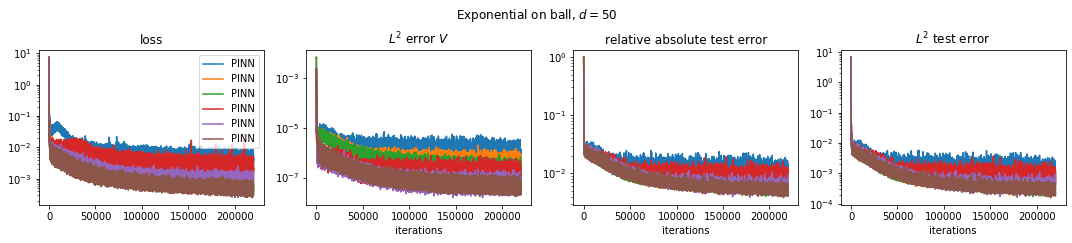

In [8]:
fig = plot_loss_logs_extended('Exponential on ball', models_pinn)

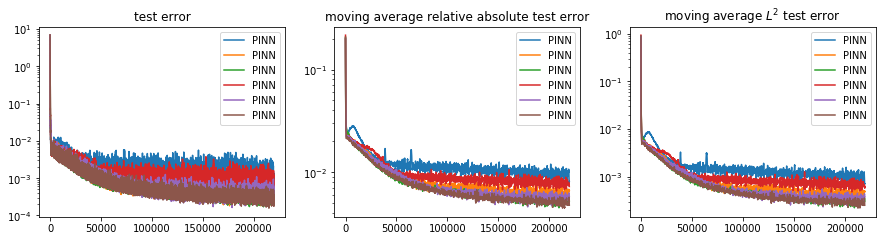

In [9]:
fig = plot_moving_average('Exponential on ball', models_pinn)

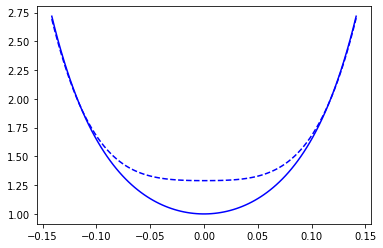

In [10]:
model = models_pinn[2]

X = pt.cat([pt.linspace(-1 / np.sqrt(d), 1 / np.sqrt(d), 100).unsqueeze(1).repeat(1, d)], 1).to(device)

plt.plot(X[:, 0].detach().cpu().numpy(), problem.v_true(X.detach()).squeeze().cpu().numpy(), color='blue')
plt.plot(X[:, 0].detach().cpu().numpy(), model.V(X).detach().cpu().numpy()[:, 0], '--', color='blue');

## Diffusion loss

In [4]:
d = 50
L = 220000
print_every = 500
delta_t = 0.001
N = 20

problem = ExponentialOnBallNonlinearSin(d=d)

models_diffusion = [EllipticSolver(problem, 'Diffusion', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[0.1, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion'),
         EllipticSolver(problem, 'Diffusion', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[1.0, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion'),
         EllipticSolver(problem, 'Diffusion', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[10.0, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion'),
         EllipticSolver(problem, 'Diffusion', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[0.1, 1.0], adaptive_forward_process=False, detach_forward=True, uniform_square=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion'),
         EllipticSolver(problem, 'Diffusion', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[1.0, 1.0], adaptive_forward_process=False, detach_forward=True, uniform_square=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion'),
         EllipticSolver(problem, 'Diffusion', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[10.0, 1.0], adaptive_forward_process=False, detach_forward=True, uniform_square=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion')]

for model in models_diffusion:
    model.V = DenseNet(d, 1, 0.001, arch=[d + 20, d, d, d]).to(device)

In [5]:
for model in models_diffusion:
    model.train()

../../solver.py:738: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V_L2[selection] += ((self.V(X[selection]).squeeze() - pt.tensor(self.problem.v_true(X[selection].detach())).float().squeeze())**2).detach().cpu() * self.delta_t_np


0 - loss = 7.4393e+00, v L2 error = 1.8510e-02, n = 7, active: 0/200, 0.15
500 - loss = 2.2014e-02, v L2 error = 6.2571e-05, n = 10, active: 0/200, 0.20
1000 - loss = 6.2378e-03, v L2 error = 2.3976e-05, n = 6, active: 0/200, 0.20
1500 - loss = 4.7092e-03, v L2 error = 1.8839e-05, n = 6, active: 0/200, 0.20
2000 - loss = 6.3952e-03, v L2 error = 1.6818e-05, n = 6, active: 0/200, 0.20
2500 - loss = 3.9544e-03, v L2 error = 2.4163e-05, n = 7, active: 0/200, 0.20
3000 - loss = 5.8684e-03, v L2 error = 2.3953e-05, n = 7, active: 0/200, 0.20
3500 - loss = 4.1776e-03, v L2 error = 2.1556e-05, n = 5, active: 0/200, 0.20
4000 - loss = 4.1984e-03, v L2 error = 1.8144e-05, n = 5, active: 0/200, 0.20
4500 - loss = 6.6030e-03, v L2 error = 2.3148e-05, n = 8, active: 0/200, 0.20
5000 - loss = 4.8180e-03, v L2 error = 1.8397e-05, n = 8, active: 0/200, 0.20
5500 - loss = 3.9252e-03, v L2 error = 1.8392e-05, n = 8, active: 0/200, 0.20
6000 - loss = 4.5034e-03, v L2 error = 2.0339e-05, n = 6, active: 0

52000 - loss = 2.0757e-03, v L2 error = 7.2940e-06, n = 7, active: 0/200, 0.20
52500 - loss = 2.1492e-03, v L2 error = 6.9214e-06, n = 7, active: 0/200, 0.20
53500 - loss = 2.0013e-03, v L2 error = 7.0885e-06, n = 5, active: 0/200, 0.20
54000 - loss = 2.0143e-03, v L2 error = 9.3647e-06, n = 7, active: 0/200, 0.20
54500 - loss = 1.4880e-03, v L2 error = 6.9264e-06, n = 8, active: 0/200, 0.20
55000 - loss = 1.3579e-03, v L2 error = 6.8524e-06, n = 6, active: 0/200, 0.20
55500 - loss = 2.4049e-03, v L2 error = 8.7944e-06, n = 6, active: 0/200, 0.21
56000 - loss = 1.7446e-03, v L2 error = 7.1830e-06, n = 5, active: 0/200, 0.20
56500 - loss = 1.6922e-03, v L2 error = 6.6858e-06, n = 7, active: 0/200, 0.21
57000 - loss = 1.9544e-03, v L2 error = 6.6395e-06, n = 6, active: 0/200, 0.21
57500 - loss = 1.5696e-03, v L2 error = 6.0690e-06, n = 6, active: 0/200, 0.20
58000 - loss = 1.4628e-03, v L2 error = 5.4521e-06, n = 8, active: 0/200, 0.20
58500 - loss = 1.9579e-03, v L2 error = 9.0722e-06, 

104500 - loss = 1.0949e-03, v L2 error = 4.8823e-06, n = 7, active: 0/200, 0.20
105000 - loss = 8.5199e-04, v L2 error = 3.4330e-06, n = 9, active: 0/200, 0.20
105500 - loss = 8.9795e-04, v L2 error = 3.6522e-06, n = 6, active: 0/200, 0.20
106000 - loss = 1.1418e-03, v L2 error = 3.5695e-06, n = 6, active: 0/200, 0.20
106500 - loss = 8.0414e-04, v L2 error = 3.8358e-06, n = 7, active: 0/200, 0.20
107000 - loss = 1.1528e-03, v L2 error = 4.2399e-06, n = 8, active: 0/200, 0.20
107500 - loss = 1.0506e-03, v L2 error = 3.6904e-06, n = 7, active: 0/200, 0.20
108000 - loss = 8.9552e-04, v L2 error = 3.5277e-06, n = 7, active: 0/200, 0.20
108500 - loss = 1.0234e-03, v L2 error = 3.3426e-06, n = 6, active: 0/200, 0.20
109000 - loss = 1.0091e-03, v L2 error = 3.3015e-06, n = 9, active: 0/200, 0.20
109500 - loss = 7.3817e-04, v L2 error = 3.9682e-06, n = 9, active: 0/200, 0.20
110000 - loss = 9.1107e-04, v L2 error = 5.6884e-06, n = 7, active: 0/200, 0.20
110500 - loss = 8.7333e-04, v L2 error =

156000 - loss = 5.5787e-04, v L2 error = 2.5372e-06, n = 6, active: 0/200, 0.20
156500 - loss = 5.3479e-04, v L2 error = 2.7363e-06, n = 7, active: 0/200, 0.20
157000 - loss = 7.3231e-04, v L2 error = 4.8008e-06, n = 7, active: 0/200, 0.20
157500 - loss = 7.7535e-04, v L2 error = 3.4541e-06, n = 8, active: 0/200, 0.20
158000 - loss = 8.5424e-04, v L2 error = 3.3531e-06, n = 6, active: 0/200, 0.20
158500 - loss = 7.1804e-04, v L2 error = 3.8903e-06, n = 8, active: 0/200, 0.20
159000 - loss = 9.4993e-04, v L2 error = 3.0059e-06, n = 6, active: 0/200, 0.20
159500 - loss = 6.3129e-04, v L2 error = 3.1744e-06, n = 7, active: 0/200, 0.20
160000 - loss = 7.4976e-04, v L2 error = 2.8994e-06, n = 8, active: 0/200, 0.20
160500 - loss = 7.2576e-04, v L2 error = 4.6963e-06, n = 6, active: 0/200, 0.20
161000 - loss = 8.5247e-04, v L2 error = 2.5329e-06, n = 7, active: 0/200, 0.20
161500 - loss = 8.6792e-04, v L2 error = 2.7198e-06, n = 6, active: 0/200, 0.20
162000 - loss = 7.0079e-04, v L2 error =

207500 - loss = 6.3863e-04, v L2 error = 2.5837e-06, n = 7, active: 0/200, 0.19
208000 - loss = 7.8167e-04, v L2 error = 4.6209e-06, n = 7, active: 0/200, 0.20
208500 - loss = 5.6794e-04, v L2 error = 3.2432e-06, n = 7, active: 0/200, 0.20
209000 - loss = 7.9529e-04, v L2 error = 3.0592e-06, n = 8, active: 0/200, 0.20
209500 - loss = 7.1509e-04, v L2 error = 2.7485e-06, n = 6, active: 0/200, 0.20
210000 - loss = 7.7980e-04, v L2 error = 2.9117e-06, n = 5, active: 0/200, 0.19
210500 - loss = 9.6589e-04, v L2 error = 3.7361e-06, n = 7, active: 0/200, 0.20
211000 - loss = 6.5008e-04, v L2 error = 2.7423e-06, n = 6, active: 0/200, 0.20
211500 - loss = 6.8987e-04, v L2 error = 3.4110e-06, n = 6, active: 0/200, 0.20
212000 - loss = 8.8725e-04, v L2 error = 3.2137e-06, n = 5, active: 0/200, 0.19
212500 - loss = 6.7076e-04, v L2 error = 3.5442e-06, n = 9, active: 0/200, 0.20
213000 - loss = 6.7577e-04, v L2 error = 2.9488e-06, n = 6, active: 0/200, 0.20
213500 - loss = 6.0742e-04, v L2 error =

39500 - loss = 7.4998e-03, v L2 error = 6.5117e-06, n = 8, active: 0/200, 0.18
40000 - loss = 7.3668e-03, v L2 error = 6.7168e-06, n = 10, active: 0/200, 0.18
40500 - loss = 6.0292e-03, v L2 error = 6.5700e-06, n = 10, active: 0/200, 0.18
41000 - loss = 5.9360e-03, v L2 error = 7.3531e-06, n = 5, active: 0/200, 0.18
41500 - loss = 6.2175e-03, v L2 error = 6.1010e-06, n = 7, active: 0/200, 0.18
42000 - loss = 6.2616e-03, v L2 error = 5.4659e-06, n = 6, active: 0/200, 0.18
42500 - loss = 6.7411e-03, v L2 error = 5.1038e-06, n = 7, active: 0/200, 0.18
43000 - loss = 7.0927e-03, v L2 error = 7.7114e-06, n = 5, active: 0/200, 0.19
43500 - loss = 6.3858e-03, v L2 error = 7.0422e-06, n = 6, active: 0/200, 0.18
44000 - loss = 6.2291e-03, v L2 error = 8.0110e-06, n = 8, active: 0/200, 0.18
44500 - loss = 6.6844e-03, v L2 error = 6.6926e-06, n = 7, active: 0/200, 0.18
45000 - loss = 6.4868e-03, v L2 error = 7.8085e-06, n = 11, active: 0/200, 0.18
45500 - loss = 7.3391e-03, v L2 error = 6.5799e-0

91500 - loss = 5.7207e-03, v L2 error = 4.5333e-06, n = 7, active: 0/200, 0.18
92000 - loss = 6.6056e-03, v L2 error = 4.4368e-06, n = 8, active: 0/200, 0.18
92500 - loss = 4.8777e-03, v L2 error = 3.2786e-06, n = 6, active: 0/200, 0.18
93000 - loss = 5.8074e-03, v L2 error = 4.0105e-06, n = 7, active: 0/200, 0.18
93500 - loss = 3.7973e-03, v L2 error = 3.8471e-06, n = 6, active: 0/200, 0.19
94000 - loss = 4.9881e-03, v L2 error = 4.5623e-06, n = 14, active: 0/200, 0.19
94500 - loss = 5.3870e-03, v L2 error = 4.8356e-06, n = 6, active: 0/200, 0.19
95000 - loss = 5.1994e-03, v L2 error = 5.9509e-06, n = 7, active: 0/200, 0.18
95500 - loss = 5.4668e-03, v L2 error = 3.7897e-06, n = 6, active: 0/200, 0.18
96000 - loss = 4.7089e-03, v L2 error = 4.6286e-06, n = 9, active: 0/200, 0.18
96500 - loss = 4.6123e-03, v L2 error = 3.2099e-06, n = 6, active: 0/200, 0.18
97000 - loss = 5.0243e-03, v L2 error = 3.8610e-06, n = 7, active: 0/200, 0.18
97500 - loss = 5.1628e-03, v L2 error = 5.1822e-06,

143000 - loss = 4.8363e-03, v L2 error = 2.9129e-06, n = 7, active: 0/200, 0.15
143500 - loss = 4.4535e-03, v L2 error = 3.8542e-06, n = 7, active: 0/200, 0.15
144000 - loss = 4.5885e-03, v L2 error = 3.4764e-06, n = 10, active: 0/200, 0.15
144500 - loss = 4.5133e-03, v L2 error = 3.6158e-06, n = 8, active: 0/200, 0.15
145000 - loss = 4.4495e-03, v L2 error = 3.4178e-06, n = 7, active: 0/200, 0.15
145500 - loss = 4.2770e-03, v L2 error = 3.3298e-06, n = 6, active: 0/200, 0.15
146000 - loss = 4.5121e-03, v L2 error = 4.1163e-06, n = 8, active: 0/200, 0.15
146500 - loss = 4.6474e-03, v L2 error = 4.7234e-06, n = 8, active: 0/200, 0.15
147000 - loss = 5.4877e-03, v L2 error = 3.6162e-06, n = 6, active: 0/200, 0.15
147500 - loss = 5.1087e-03, v L2 error = 2.7653e-06, n = 8, active: 0/200, 0.15
148000 - loss = 4.8178e-03, v L2 error = 4.9767e-06, n = 10, active: 0/200, 0.15
148500 - loss = 4.9173e-03, v L2 error = 3.4756e-06, n = 6, active: 0/200, 0.15
149000 - loss = 4.6945e-03, v L2 error

194500 - loss = 4.9256e-03, v L2 error = 3.2069e-06, n = 5, active: 0/200, 0.15
195000 - loss = 4.1259e-03, v L2 error = 2.8170e-06, n = 7, active: 0/200, 0.15
195500 - loss = 5.4483e-03, v L2 error = 2.7273e-06, n = 6, active: 0/200, 0.15
196000 - loss = 4.2986e-03, v L2 error = 3.5784e-06, n = 9, active: 0/200, 0.15
196500 - loss = 4.4558e-03, v L2 error = 2.7229e-06, n = 9, active: 0/200, 0.16
197000 - loss = 4.4487e-03, v L2 error = 2.8736e-06, n = 6, active: 0/200, 0.15
197500 - loss = 4.1483e-03, v L2 error = 4.4226e-06, n = 6, active: 0/200, 0.15
198000 - loss = 5.2356e-03, v L2 error = 3.8215e-06, n = 7, active: 0/200, 0.15
198500 - loss = 4.6918e-03, v L2 error = 2.7509e-06, n = 6, active: 0/200, 0.15
199000 - loss = 4.3683e-03, v L2 error = 3.9061e-06, n = 8, active: 0/200, 0.15
199500 - loss = 4.6720e-03, v L2 error = 3.2803e-06, n = 6, active: 0/200, 0.15
200000 - loss = 4.4665e-03, v L2 error = 2.8938e-06, n = 10, active: 0/200, 0.15
200500 - loss = 4.4694e-03, v L2 error 

26500 - loss = 4.8823e-02, v L2 error = 1.1293e-05, n = 8, active: 0/200, 0.15
27000 - loss = 5.7482e-02, v L2 error = 1.0050e-05, n = 6, active: 0/200, 0.15
27500 - loss = 3.8442e-02, v L2 error = 1.4082e-05, n = 6, active: 0/200, 0.15
28000 - loss = 4.5065e-02, v L2 error = 1.4081e-05, n = 10, active: 0/200, 0.16
28500 - loss = 4.2317e-02, v L2 error = 1.2943e-05, n = 7, active: 0/200, 0.15
29000 - loss = 4.1371e-02, v L2 error = 1.0431e-05, n = 5, active: 0/200, 0.15
29500 - loss = 4.9093e-02, v L2 error = 1.0988e-05, n = 7, active: 0/200, 0.15
30000 - loss = 4.3308e-02, v L2 error = 8.0292e-06, n = 5, active: 0/200, 0.15
30500 - loss = 5.0369e-02, v L2 error = 8.3713e-06, n = 7, active: 0/200, 0.15
31000 - loss = 3.6570e-02, v L2 error = 1.0508e-05, n = 7, active: 0/200, 0.15
31500 - loss = 4.7024e-02, v L2 error = 1.1982e-05, n = 6, active: 0/200, 0.15
32000 - loss = 4.3851e-02, v L2 error = 1.7326e-05, n = 7, active: 0/200, 0.16
32500 - loss = 4.6528e-02, v L2 error = 8.5490e-06,

78500 - loss = 4.8885e-02, v L2 error = 1.1981e-05, n = 8, active: 0/200, 0.17
79000 - loss = 5.2792e-02, v L2 error = 1.3799e-05, n = 8, active: 0/200, 0.18
79500 - loss = 4.6103e-02, v L2 error = 1.0181e-05, n = 10, active: 0/200, 0.18
80000 - loss = 4.4131e-02, v L2 error = 9.5126e-06, n = 6, active: 0/200, 0.17
80500 - loss = 4.1713e-02, v L2 error = 1.0982e-05, n = 9, active: 0/200, 0.17
81000 - loss = 4.2060e-02, v L2 error = 1.0311e-05, n = 7, active: 0/200, 0.17
81500 - loss = 4.7828e-02, v L2 error = 8.8278e-06, n = 6, active: 0/200, 0.17
82000 - loss = 4.1821e-02, v L2 error = 1.2888e-05, n = 11, active: 0/200, 0.17
82500 - loss = 4.4436e-02, v L2 error = 7.5629e-06, n = 6, active: 0/200, 0.18
83000 - loss = 4.3459e-02, v L2 error = 1.2026e-05, n = 8, active: 0/200, 0.17
83500 - loss = 3.8096e-02, v L2 error = 6.8105e-06, n = 6, active: 0/200, 0.18
84000 - loss = 3.9944e-02, v L2 error = 1.2676e-05, n = 7, active: 0/200, 0.17
84500 - loss = 4.4914e-02, v L2 error = 1.0879e-05

130000 - loss = 3.6912e-02, v L2 error = 1.0613e-05, n = 6, active: 0/200, 0.17
130500 - loss = 5.1174e-02, v L2 error = 1.2106e-05, n = 6, active: 0/200, 0.17
131000 - loss = 4.2570e-02, v L2 error = 8.7897e-06, n = 6, active: 0/200, 0.17
131500 - loss = 4.4580e-02, v L2 error = 7.6030e-06, n = 9, active: 0/200, 0.17
132000 - loss = 4.0949e-02, v L2 error = 1.0341e-05, n = 7, active: 0/200, 0.17
132500 - loss = 5.0040e-02, v L2 error = 7.6380e-06, n = 8, active: 0/200, 0.18
133000 - loss = 7.0571e-02, v L2 error = 9.4968e-06, n = 8, active: 0/200, 0.17
133500 - loss = 3.1404e-02, v L2 error = 7.1982e-06, n = 5, active: 0/200, 0.17
134000 - loss = 5.4477e-02, v L2 error = 6.4300e-06, n = 6, active: 0/200, 0.17
134500 - loss = 3.6732e-02, v L2 error = 6.3335e-06, n = 7, active: 0/200, 0.17
135000 - loss = 4.6528e-02, v L2 error = 1.0233e-05, n = 9, active: 0/200, 0.17
135500 - loss = 3.6312e-02, v L2 error = 9.1547e-06, n = 7, active: 0/200, 0.17
136000 - loss = 3.9318e-02, v L2 error =

181500 - loss = 4.3451e-02, v L2 error = 8.8822e-06, n = 8, active: 0/200, 0.17
182000 - loss = 4.1319e-02, v L2 error = 1.1299e-05, n = 7, active: 0/200, 0.17
182500 - loss = 4.5516e-02, v L2 error = 1.2210e-05, n = 7, active: 0/200, 0.17
183000 - loss = 4.7253e-02, v L2 error = 1.0201e-05, n = 8, active: 0/200, 0.17
183500 - loss = 4.5625e-02, v L2 error = 8.2772e-06, n = 6, active: 0/200, 0.17
184000 - loss = 4.4657e-02, v L2 error = 5.3445e-06, n = 7, active: 0/200, 0.17
184500 - loss = 3.9892e-02, v L2 error = 8.5739e-06, n = 7, active: 0/200, 0.17
185000 - loss = 3.5287e-02, v L2 error = 1.0013e-05, n = 6, active: 0/200, 0.17
185500 - loss = 5.1212e-02, v L2 error = 7.8813e-06, n = 7, active: 0/200, 0.17
186000 - loss = 4.2528e-02, v L2 error = 6.2063e-06, n = 8, active: 0/200, 0.17
186500 - loss = 4.9057e-02, v L2 error = 7.4404e-06, n = 6, active: 0/200, 0.17
187000 - loss = 4.2818e-02, v L2 error = 6.3681e-06, n = 9, active: 0/200, 0.17
187500 - loss = 4.1201e-02, v L2 error =

13000 - loss = 4.3862e-03, v L2 error = 3.3343e-05, n = 19, active: 1/200, 0.27
13500 - loss = 4.5172e-03, v L2 error = 3.5507e-05, n = 18, active: 0/200, 0.27
14000 - loss = 4.3639e-03, v L2 error = 3.1164e-05, n = 15, active: 0/200, 0.27
14500 - loss = 3.8072e-03, v L2 error = 2.8767e-05, n = 17, active: 0/200, 0.27
15000 - loss = 3.9222e-03, v L2 error = 3.6581e-05, n = 19, active: 0/200, 0.27
15500 - loss = 4.2957e-03, v L2 error = 3.5684e-05, n = 18, active: 0/200, 0.27
16000 - loss = 4.7588e-03, v L2 error = 2.7409e-05, n = 17, active: 0/200, 0.26
16500 - loss = 3.9647e-03, v L2 error = 3.0437e-05, n = 18, active: 0/200, 0.27
17000 - loss = 4.3980e-03, v L2 error = 2.9375e-05, n = 18, active: 0/200, 0.27
17500 - loss = 3.8833e-03, v L2 error = 3.3639e-05, n = 19, active: 0/200, 0.27
18000 - loss = 4.9856e-03, v L2 error = 3.3773e-05, n = 17, active: 0/200, 0.26
18500 - loss = 4.3314e-03, v L2 error = 3.8678e-05, n = 18, active: 0/200, 0.27
19000 - loss = 3.5890e-03, v L2 error = 

64500 - loss = 2.3146e-03, v L2 error = 1.2693e-05, n = 16, active: 0/200, 0.27
65000 - loss = 2.5565e-03, v L2 error = 9.7405e-06, n = 18, active: 0/200, 0.27
65500 - loss = 2.3879e-03, v L2 error = 1.0262e-05, n = 19, active: 2/200, 0.27
66000 - loss = 2.1984e-03, v L2 error = 1.1561e-05, n = 18, active: 0/200, 0.27
66500 - loss = 2.1255e-03, v L2 error = 1.0627e-05, n = 17, active: 0/200, 0.27
67000 - loss = 2.7254e-03, v L2 error = 1.0301e-05, n = 17, active: 0/200, 0.27
67500 - loss = 2.7606e-03, v L2 error = 1.1110e-05, n = 18, active: 0/200, 0.27
68000 - loss = 2.5930e-03, v L2 error = 9.5728e-06, n = 17, active: 0/200, 0.27
68500 - loss = 2.2243e-03, v L2 error = 1.0432e-05, n = 16, active: 0/200, 0.27
69000 - loss = 2.4805e-03, v L2 error = 1.1577e-05, n = 16, active: 0/200, 0.27
69500 - loss = 2.8015e-03, v L2 error = 9.2012e-06, n = 16, active: 0/200, 0.27
70000 - loss = 2.3423e-03, v L2 error = 1.0371e-05, n = 19, active: 1/200, 0.27
70500 - loss = 2.6543e-03, v L2 error = 

116000 - loss = 1.7508e-03, v L2 error = 6.8878e-06, n = 17, active: 0/200, 0.34
116500 - loss = 1.6192e-03, v L2 error = 6.9779e-06, n = 16, active: 0/200, 0.34
117000 - loss = 1.8101e-03, v L2 error = 7.1227e-06, n = 18, active: 0/200, 0.33
117500 - loss = 1.8169e-03, v L2 error = 7.0068e-06, n = 16, active: 0/200, 0.34
118000 - loss = 1.6641e-03, v L2 error = 7.4733e-06, n = 17, active: 0/200, 0.34
118500 - loss = 1.8514e-03, v L2 error = 7.9131e-06, n = 16, active: 0/200, 0.34
119000 - loss = 1.5373e-03, v L2 error = 7.1506e-06, n = 15, active: 0/200, 0.34
119500 - loss = 2.1528e-03, v L2 error = 7.4845e-06, n = 18, active: 0/200, 0.34
120000 - loss = 1.8750e-03, v L2 error = 6.4242e-06, n = 17, active: 0/200, 0.34
120500 - loss = 1.5339e-03, v L2 error = 8.7092e-06, n = 18, active: 0/200, 0.33
121000 - loss = 1.8174e-03, v L2 error = 7.2236e-06, n = 16, active: 0/200, 0.34
121500 - loss = 1.5818e-03, v L2 error = 7.8626e-06, n = 17, active: 0/200, 0.33
122000 - loss = 1.8050e-03, 

167000 - loss = 1.8175e-03, v L2 error = 6.6793e-06, n = 15, active: 0/200, 0.35
167500 - loss = 1.8434e-03, v L2 error = 7.2747e-06, n = 17, active: 0/200, 0.35
168000 - loss = 1.8637e-03, v L2 error = 7.6386e-06, n = 19, active: 0/200, 0.35
168500 - loss = 1.1557e-03, v L2 error = 6.4687e-06, n = 17, active: 0/200, 0.34
169000 - loss = 1.4406e-03, v L2 error = 6.0238e-06, n = 17, active: 0/200, 0.34
169500 - loss = 1.4710e-03, v L2 error = 6.5429e-06, n = 16, active: 0/200, 0.35
170000 - loss = 1.5803e-03, v L2 error = 7.5326e-06, n = 17, active: 0/200, 0.35
170500 - loss = 1.6138e-03, v L2 error = 6.6358e-06, n = 18, active: 0/200, 0.35
171000 - loss = 1.8139e-03, v L2 error = 6.1170e-06, n = 17, active: 0/200, 0.35
171500 - loss = 1.5310e-03, v L2 error = 6.2875e-06, n = 18, active: 0/200, 0.35
172000 - loss = 1.6357e-03, v L2 error = 9.1631e-06, n = 19, active: 1/200, 0.35
172500 - loss = 1.8370e-03, v L2 error = 6.2180e-06, n = 19, active: 1/200, 0.35
173000 - loss = 1.6299e-03, 

218000 - loss = 1.6656e-03, v L2 error = 7.9437e-06, n = 16, active: 0/200, 0.32
218500 - loss = 1.7388e-03, v L2 error = 6.2586e-06, n = 17, active: 0/200, 0.32
219000 - loss = 1.7695e-03, v L2 error = 7.1758e-06, n = 19, active: 0/200, 0.32
219500 - loss = 1.7634e-03, v L2 error = 6.8644e-06, n = 17, active: 0/200, 0.32
0 - loss = 7.4428e+00, v L2 error = 3.6072e-02, n = 19, active: 1/200, 0.34
500 - loss = 5.2548e-02, v L2 error = 9.6091e-05, n = 18, active: 0/200, 0.35
1000 - loss = 2.9715e-02, v L2 error = 4.2324e-05, n = 16, active: 0/200, 0.41
1500 - loss = 2.7867e-02, v L2 error = 3.2280e-05, n = 19, active: 0/200, 0.45
2000 - loss = 2.4210e-02, v L2 error = 2.5142e-05, n = 19, active: 0/200, 0.49
2500 - loss = 1.6085e-02, v L2 error = 2.0908e-05, n = 19, active: 0/200, 0.50
3000 - loss = 1.8844e-02, v L2 error = 3.2426e-05, n = 17, active: 0/200, 0.51
3500 - loss = 2.0525e-02, v L2 error = 3.8382e-05, n = 16, active: 0/200, 0.51
4000 - loss = 2.2770e-02, v L2 error = 2.6115e-0

49500 - loss = 1.6890e-02, v L2 error = 9.6042e-06, n = 19, active: 0/200, 0.50
50000 - loss = 1.6996e-02, v L2 error = 1.0848e-05, n = 19, active: 0/200, 0.50
50500 - loss = 1.3940e-02, v L2 error = 9.4320e-06, n = 16, active: 0/200, 0.48
51000 - loss = 1.7538e-02, v L2 error = 9.2037e-06, n = 19, active: 0/200, 0.44
51500 - loss = 1.1741e-02, v L2 error = 9.5166e-06, n = 18, active: 0/200, 0.37
52000 - loss = 1.7107e-02, v L2 error = 1.1718e-05, n = 19, active: 0/200, 0.43
52500 - loss = 1.8013e-02, v L2 error = 1.1543e-05, n = 17, active: 0/200, 0.46
53000 - loss = 1.8172e-02, v L2 error = 1.0035e-05, n = 19, active: 1/200, 0.48
53500 - loss = 1.6579e-02, v L2 error = 8.7035e-06, n = 18, active: 0/200, 0.47
54000 - loss = 1.4672e-02, v L2 error = 9.1672e-06, n = 17, active: 0/200, 0.45
54500 - loss = 1.4782e-02, v L2 error = 8.9019e-06, n = 17, active: 0/200, 0.39
55000 - loss = 1.6206e-02, v L2 error = 1.0111e-05, n = 19, active: 0/200, 0.39
55500 - loss = 1.5926e-02, v L2 error = 

101000 - loss = 1.5279e-02, v L2 error = 7.5420e-06, n = 17, active: 0/200, 0.37
101500 - loss = 1.4406e-02, v L2 error = 8.8302e-06, n = 17, active: 0/200, 0.37
102000 - loss = 1.5519e-02, v L2 error = 1.1209e-05, n = 19, active: 0/200, 0.37
102500 - loss = 1.6551e-02, v L2 error = 8.2563e-06, n = 18, active: 0/200, 0.37
103000 - loss = 1.5945e-02, v L2 error = 9.2576e-06, n = 17, active: 0/200, 0.37
103500 - loss = 1.2829e-02, v L2 error = 7.7731e-06, n = 19, active: 1/200, 0.37
104000 - loss = 1.5838e-02, v L2 error = 8.2371e-06, n = 19, active: 0/200, 0.37
104500 - loss = 1.4429e-02, v L2 error = 7.4882e-06, n = 17, active: 0/200, 0.37
105000 - loss = 1.6306e-02, v L2 error = 9.0246e-06, n = 18, active: 0/200, 0.37
105500 - loss = 1.5238e-02, v L2 error = 9.2268e-06, n = 16, active: 0/200, 0.36
106000 - loss = 1.4774e-02, v L2 error = 7.6677e-06, n = 17, active: 0/200, 0.37
106500 - loss = 1.1336e-02, v L2 error = 7.7626e-06, n = 16, active: 0/200, 0.37
107000 - loss = 1.4375e-02, 

152000 - loss = 1.3725e-02, v L2 error = 6.4451e-06, n = 19, active: 0/200, 0.32
152500 - loss = 1.1929e-02, v L2 error = 8.3684e-06, n = 18, active: 0/200, 0.31
153000 - loss = 1.3794e-02, v L2 error = 7.6434e-06, n = 17, active: 0/200, 0.31
153500 - loss = 1.7232e-02, v L2 error = 8.0501e-06, n = 17, active: 0/200, 0.31
154000 - loss = 1.3859e-02, v L2 error = 9.0625e-06, n = 17, active: 0/200, 0.32
154500 - loss = 1.3933e-02, v L2 error = 9.3246e-06, n = 17, active: 0/200, 0.32
155000 - loss = 1.5898e-02, v L2 error = 7.9077e-06, n = 19, active: 1/200, 0.31
155500 - loss = 1.5496e-02, v L2 error = 9.3678e-06, n = 17, active: 0/200, 0.31
156000 - loss = 1.2046e-02, v L2 error = 6.9604e-06, n = 16, active: 0/200, 0.31
156500 - loss = 1.2652e-02, v L2 error = 8.8569e-06, n = 17, active: 0/200, 0.31
157000 - loss = 1.4609e-02, v L2 error = 7.7500e-06, n = 16, active: 0/200, 0.32
157500 - loss = 1.1380e-02, v L2 error = 7.5120e-06, n = 17, active: 0/200, 0.32
158000 - loss = 1.2877e-02, 

203000 - loss = 1.4970e-02, v L2 error = 7.9505e-06, n = 19, active: 1/200, 0.44
203500 - loss = 1.4062e-02, v L2 error = 6.5462e-06, n = 18, active: 0/200, 0.43
204000 - loss = 1.3571e-02, v L2 error = 7.1364e-06, n = 19, active: 0/200, 0.43
204500 - loss = 1.6497e-02, v L2 error = 8.3518e-06, n = 17, active: 0/200, 0.43
205000 - loss = 1.3088e-02, v L2 error = 8.4464e-06, n = 19, active: 0/200, 0.43
205500 - loss = 1.4749e-02, v L2 error = 6.4281e-06, n = 18, active: 0/200, 0.43
206000 - loss = 1.3324e-02, v L2 error = 9.0321e-06, n = 19, active: 0/200, 0.43
206500 - loss = 1.5239e-02, v L2 error = 7.3101e-06, n = 18, active: 0/200, 0.42
207000 - loss = 1.3374e-02, v L2 error = 6.6326e-06, n = 18, active: 0/200, 0.42
207500 - loss = 1.5056e-02, v L2 error = 6.2704e-06, n = 18, active: 0/200, 0.42
208000 - loss = 1.7065e-02, v L2 error = 9.0970e-06, n = 19, active: 1/200, 0.43
208500 - loss = 1.5984e-02, v L2 error = 6.9463e-06, n = 18, active: 0/200, 0.42
209000 - loss = 1.5158e-02, 

34500 - loss = 1.6316e-01, v L2 error = 3.6655e-05, n = 19, active: 1/200, 0.43
35000 - loss = 1.4010e-01, v L2 error = 1.7263e-05, n = 16, active: 0/200, 0.43
35500 - loss = 1.5871e-01, v L2 error = 4.8741e-05, n = 18, active: 0/200, 0.43
36000 - loss = 1.4487e-01, v L2 error = 9.3093e-05, n = 18, active: 0/200, 0.43
36500 - loss = 1.3776e-01, v L2 error = 5.5559e-05, n = 18, active: 0/200, 0.43
37000 - loss = 1.4575e-01, v L2 error = 2.1885e-05, n = 16, active: 0/200, 0.43
37500 - loss = 1.4281e-01, v L2 error = 1.9371e-05, n = 18, active: 0/200, 0.43
38000 - loss = 1.3618e-01, v L2 error = 2.3427e-05, n = 17, active: 0/200, 0.44
38500 - loss = 1.2580e-01, v L2 error = 2.7158e-05, n = 19, active: 1/200, 0.43
39000 - loss = 1.4401e-01, v L2 error = 4.2373e-05, n = 18, active: 0/200, 0.42
39500 - loss = 1.6267e-01, v L2 error = 3.6339e-05, n = 17, active: 0/200, 0.43
40000 - loss = 1.3806e-01, v L2 error = 3.2072e-05, n = 19, active: 1/200, 0.43
40500 - loss = 1.3261e-01, v L2 error = 

86000 - loss = 1.3147e-01, v L2 error = 2.9384e-05, n = 16, active: 0/200, 0.33
86500 - loss = 1.5854e-01, v L2 error = 6.1647e-05, n = 19, active: 0/200, 0.34
87000 - loss = 1.4535e-01, v L2 error = 3.5816e-05, n = 19, active: 0/200, 0.33
87500 - loss = 1.6512e-01, v L2 error = 2.4784e-05, n = 19, active: 1/200, 0.33
88000 - loss = 1.4392e-01, v L2 error = 4.0831e-05, n = 17, active: 0/200, 0.34
88500 - loss = 1.2603e-01, v L2 error = 2.3535e-05, n = 19, active: 2/200, 0.33
89000 - loss = 1.5061e-01, v L2 error = 1.9383e-05, n = 17, active: 0/200, 0.37
89500 - loss = 1.5265e-01, v L2 error = 2.0677e-05, n = 16, active: 0/200, 0.38
90000 - loss = 1.3749e-01, v L2 error = 5.1197e-05, n = 17, active: 0/200, 0.38
90500 - loss = 1.3430e-01, v L2 error = 4.1574e-05, n = 16, active: 0/200, 0.38
91000 - loss = 1.2050e-01, v L2 error = 3.0743e-05, n = 16, active: 0/200, 0.38
91500 - loss = 1.3449e-01, v L2 error = 2.6874e-05, n = 18, active: 0/200, 0.39
92000 - loss = 1.5472e-01, v L2 error = 

137000 - loss = 1.3984e-01, v L2 error = 3.0236e-05, n = 18, active: 0/200, 0.31
137500 - loss = 1.2693e-01, v L2 error = 2.5172e-05, n = 19, active: 0/200, 0.31
138000 - loss = 1.4164e-01, v L2 error = 3.0013e-05, n = 17, active: 0/200, 0.32
138500 - loss = 1.6932e-01, v L2 error = 1.7377e-05, n = 17, active: 0/200, 0.32
139000 - loss = 1.3733e-01, v L2 error = 2.3675e-05, n = 19, active: 0/200, 0.33
139500 - loss = 1.3940e-01, v L2 error = 2.6065e-05, n = 18, active: 0/200, 0.34
140000 - loss = 1.4959e-01, v L2 error = 3.1759e-05, n = 19, active: 0/200, 0.34
140500 - loss = 1.2441e-01, v L2 error = 2.5776e-05, n = 18, active: 0/200, 0.33
141000 - loss = 1.2715e-01, v L2 error = 1.7844e-05, n = 17, active: 0/200, 0.34
141500 - loss = 1.0377e-01, v L2 error = 2.7825e-05, n = 18, active: 0/200, 0.33
142000 - loss = 1.5748e-01, v L2 error = 3.6367e-05, n = 19, active: 0/200, 0.34
142500 - loss = 1.6603e-01, v L2 error = 3.2469e-05, n = 16, active: 0/200, 0.33
143000 - loss = 1.4308e-01, 

188000 - loss = 1.4272e-01, v L2 error = 1.6544e-05, n = 18, active: 0/200, 0.61
188500 - loss = 1.2253e-01, v L2 error = 2.4390e-05, n = 17, active: 0/200, 0.61
189000 - loss = 9.9871e-02, v L2 error = 1.3063e-05, n = 19, active: 0/200, 0.62
189500 - loss = 1.1960e-01, v L2 error = 2.6568e-05, n = 16, active: 0/200, 0.64
190000 - loss = 1.5470e-01, v L2 error = 2.0076e-05, n = 19, active: 0/200, 0.64
190500 - loss = 1.5446e-01, v L2 error = 1.6421e-05, n = 18, active: 0/200, 0.64
191000 - loss = 1.3472e-01, v L2 error = 2.3483e-05, n = 18, active: 0/200, 0.63
191500 - loss = 1.3440e-01, v L2 error = 5.2162e-05, n = 17, active: 0/200, 0.64
192000 - loss = 1.3692e-01, v L2 error = 4.4481e-05, n = 16, active: 0/200, 0.64
192500 - loss = 1.5137e-01, v L2 error = 3.5006e-05, n = 18, active: 0/200, 0.65
193000 - loss = 1.4261e-01, v L2 error = 4.0868e-05, n = 19, active: 0/200, 0.65
193500 - loss = 1.4698e-01, v L2 error = 3.2622e-05, n = 18, active: 0/200, 0.61
194000 - loss = 1.2744e-01, 

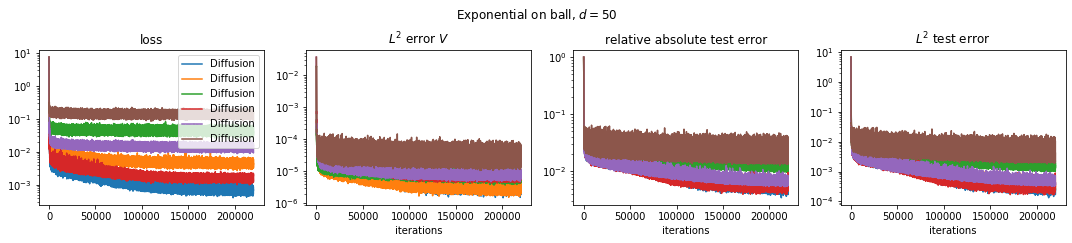

In [11]:
fig = plot_loss_logs_extended('Exponential on ball', models_diffusion)

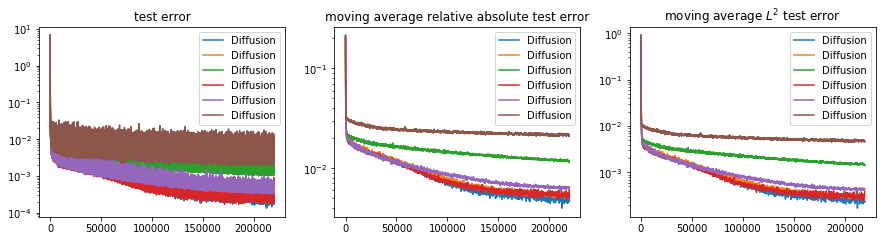

In [12]:
fig = plot_moving_average('Exponential on ball', models_diffusion)

## BSDE loss

In [6]:
d = 50
L = 220000
print_every = 500
delta_t = 0.001
N = 200000

problem = ExponentialOnBallNonlinearSin(d=d)

models_bsde = [EllipticSolver(problem, 'BSDE', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[1.0, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='BSDE')]
for model in models_bsde:
    model.V = DenseNet(d, 1, 0.001, arch=[d + 20, d, d, d]).to(device)

In [ ]:
for model in models_bsde:
    model.train()

../../solver.py:738: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V_L2[selection] += ((self.V(X[selection]).squeeze() - pt.tensor(self.problem.v_true(X[selection].detach())).float().squeeze())**2).detach().cpu() * self.delta_t_np


0 - loss = 9.0990e+00, v L2 error = 1.8510e-02, n = 7, active: 0/200, 0.23
500 - loss = 1.9391e-02, v L2 error = 2.7185e-05, n = 10, active: 0/200, 0.33
1000 - loss = 1.7056e-02, v L2 error = 1.8230e-05, n = 6, active: 0/200, 0.33
1500 - loss = 1.1808e-02, v L2 error = 1.4161e-05, n = 6, active: 0/200, 0.35
2000 - loss = 1.4638e-02, v L2 error = 1.3407e-05, n = 6, active: 0/200, 0.34
2500 - loss = 1.3427e-02, v L2 error = 1.2498e-05, n = 7, active: 0/200, 0.35
3000 - loss = 1.2273e-02, v L2 error = 1.1479e-05, n = 7, active: 0/200, 0.35
3500 - loss = 1.0912e-02, v L2 error = 1.0181e-05, n = 5, active: 0/200, 0.36
4000 - loss = 1.2072e-02, v L2 error = 8.5615e-06, n = 5, active: 0/200, 0.34
4500 - loss = 9.9278e-03, v L2 error = 8.1316e-06, n = 8, active: 0/200, 0.36
5000 - loss = 1.0829e-02, v L2 error = 1.0522e-05, n = 8, active: 0/200, 0.34
5500 - loss = 1.2066e-02, v L2 error = 9.2182e-06, n = 8, active: 0/200, 0.34
6000 - loss = 1.0578e-02, v L2 error = 9.0119e-06, n = 6, active: 0

52000 - loss = 8.4347e-03, v L2 error = 5.0352e-06, n = 7, active: 0/200, 0.23
52500 - loss = 9.4272e-03, v L2 error = 4.5034e-06, n = 7, active: 0/200, 0.23
53000 - loss = 7.4199e-03, v L2 error = 5.1646e-06, n = 8, active: 0/200, 0.23
53500 - loss = 1.0002e-02, v L2 error = 4.6516e-06, n = 5, active: 0/200, 0.22
54000 - loss = 8.7631e-03, v L2 error = 6.7372e-06, n = 7, active: 0/200, 0.23
54500 - loss = 8.4099e-03, v L2 error = 9.2956e-06, n = 8, active: 0/200, 0.23
55000 - loss = 1.0113e-02, v L2 error = 4.1293e-06, n = 6, active: 0/200, 0.24
55500 - loss = 9.2776e-03, v L2 error = 5.1434e-06, n = 6, active: 0/200, 0.24
56000 - loss = 6.1568e-03, v L2 error = 5.0053e-06, n = 5, active: 0/200, 0.23
56500 - loss = 7.4232e-03, v L2 error = 3.7589e-06, n = 7, active: 0/200, 0.24
57000 - loss = 7.9005e-03, v L2 error = 5.2920e-06, n = 6, active: 0/200, 0.24
57500 - loss = 7.4119e-03, v L2 error = 5.8074e-06, n = 6, active: 0/200, 0.23
58000 - loss = 8.1338e-03, v L2 error = 5.8888e-06, 

104000 - loss = 6.9140e-03, v L2 error = 4.0157e-06, n = 8, active: 0/200, 0.29
104500 - loss = 6.8082e-03, v L2 error = 4.8261e-06, n = 7, active: 0/200, 0.29
105000 - loss = 6.7089e-03, v L2 error = 3.5601e-06, n = 9, active: 0/200, 0.29
105500 - loss = 6.1138e-03, v L2 error = 4.1315e-06, n = 6, active: 0/200, 0.29
106000 - loss = 7.3938e-03, v L2 error = 3.7014e-06, n = 6, active: 0/200, 0.29
106500 - loss = 7.3815e-03, v L2 error = 3.4771e-06, n = 7, active: 0/200, 0.29
107000 - loss = 7.9762e-03, v L2 error = 3.0777e-06, n = 8, active: 0/200, 0.29
107500 - loss = 7.2387e-03, v L2 error = 5.0406e-06, n = 7, active: 0/200, 0.29
108000 - loss = 7.2652e-03, v L2 error = 4.0438e-06, n = 7, active: 0/200, 0.29
108500 - loss = 7.9539e-03, v L2 error = 2.3136e-06, n = 6, active: 0/200, 0.29
109000 - loss = 5.8311e-03, v L2 error = 3.0370e-06, n = 9, active: 0/200, 0.28
109500 - loss = 6.9018e-03, v L2 error = 3.6707e-06, n = 9, active: 0/200, 0.29
110000 - loss = 8.0449e-03, v L2 error =

155500 - loss = 7.5771e-03, v L2 error = 6.0775e-06, n = 7, active: 0/200, 0.36
156000 - loss = 4.7718e-03, v L2 error = 4.5005e-06, n = 6, active: 0/200, 0.37
156500 - loss = 5.1435e-03, v L2 error = 4.2410e-06, n = 7, active: 0/200, 0.37
157000 - loss = 6.8461e-03, v L2 error = 5.3925e-06, n = 7, active: 0/200, 0.37
157500 - loss = 7.5037e-03, v L2 error = 7.0454e-06, n = 8, active: 0/200, 0.37
158000 - loss = 6.7277e-03, v L2 error = 4.1852e-06, n = 6, active: 0/200, 0.36
158500 - loss = 6.7371e-03, v L2 error = 6.4038e-06, n = 8, active: 0/200, 0.36
159000 - loss = 8.2299e-03, v L2 error = 5.1561e-06, n = 6, active: 0/200, 0.36
159500 - loss = 5.2127e-03, v L2 error = 6.5339e-06, n = 7, active: 0/200, 0.37
160000 - loss = 7.3536e-03, v L2 error = 6.0877e-06, n = 8, active: 0/200, 0.37
160500 - loss = 7.4009e-03, v L2 error = 4.5429e-06, n = 6, active: 0/200, 0.36
161000 - loss = 6.3127e-03, v L2 error = 4.1238e-06, n = 7, active: 0/200, 0.36
161500 - loss = 6.6736e-03, v L2 error =

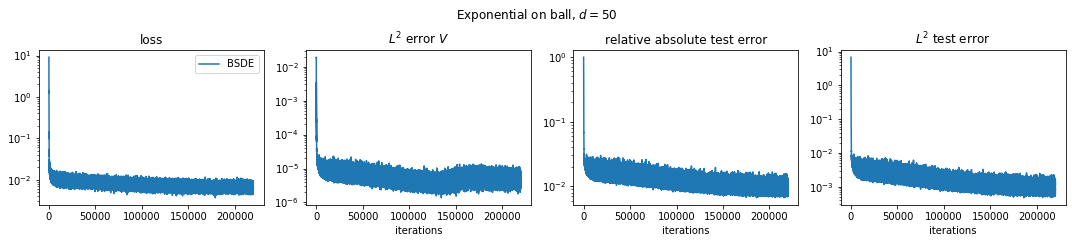

In [13]:
fig = plot_loss_logs_extended('Exponential on ball', models_bsde)

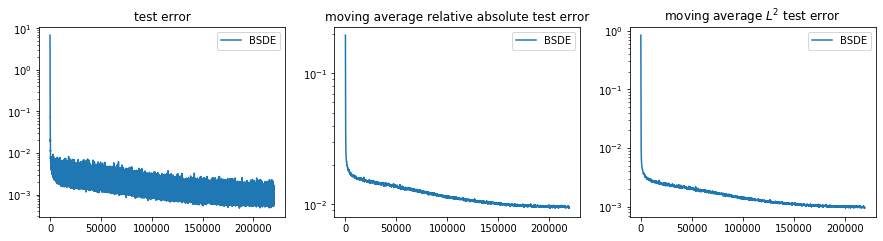

In [14]:
fig = plot_moving_average('Exponential on ball', models_bsde)

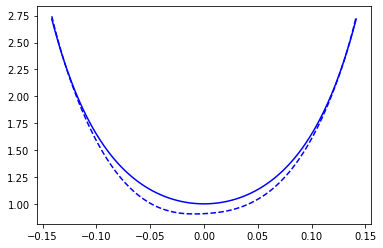

In [15]:
model = models_bsde[0]

X = pt.cat([pt.linspace(-1 / np.sqrt(d), 1 / np.sqrt(d), 100).unsqueeze(1).repeat(1, d)], 1).to(device)

plt.plot(X[:, 0].detach().cpu().numpy(), problem.v_true(X.detach()).squeeze().cpu().numpy(), color='blue')
plt.plot(X[:, 0].detach().cpu().numpy(), model.V(X).detach().cpu().numpy()[:, 0], '--', color='blue');

## Comparison

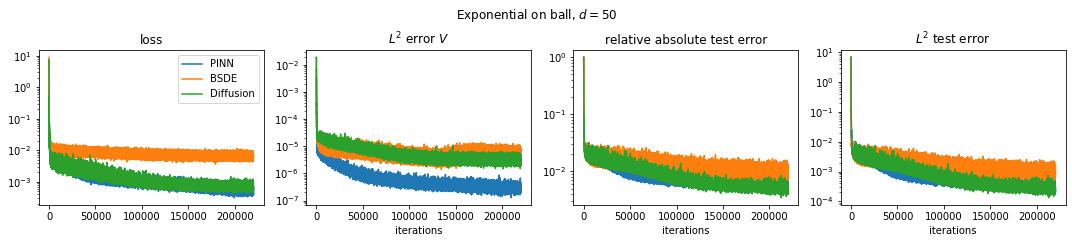

In [16]:
fig = plot_loss_logs_extended('Exponential on ball', models_pinn[2:3] + models_bsde[0:1] + models_diffusion[0:1])

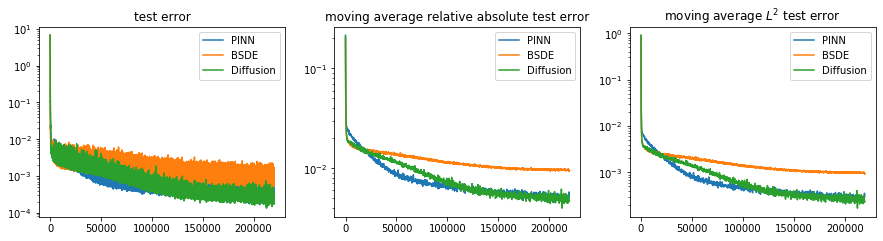

In [17]:
fig = plot_moving_average('Exponential on ball', models_pinn[2:3] + models_bsde[0:1] + models_diffusion[0:1])

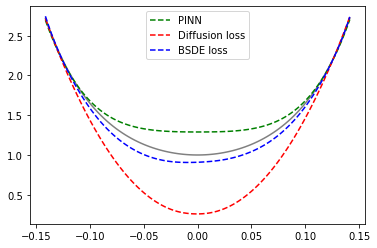

In [20]:
model_1 = models_pinn[2]
model_2 = models_diffusion[0]
model_3 = models_bsde[0]


X = pt.cat([pt.linspace(-1 / np.sqrt(d), 1 / np.sqrt(d), 100).unsqueeze(1).repeat(1, d)], 1).to(device)

plt.plot(X[:, 0].detach().cpu().numpy(), problem.v_true(X.detach()).squeeze().cpu().numpy(), color='gray')
plt.plot(X[:, 0].detach().cpu().numpy(), model_1.V(X).detach().cpu().numpy()[:, 0], '--', color='green', label='PINN');
plt.plot(X[:, 0].detach().cpu().numpy(), model_2.V(X).detach().cpu().numpy()[:, 0], '--', color='red', label='Diffusion loss');
plt.plot(X[:, 0].detach().cpu().numpy(), model_3.V(X).detach().cpu().numpy()[:, 0], '--', color='blue', label='BSDE loss');
plt.legend();

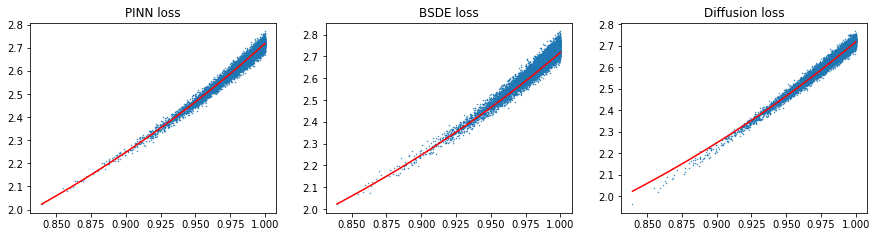

In [24]:
K = 10000
X = pt.randn(K, problem.d).to(device)
X = problem.boundary_distance * X / pt.sqrt(pt.sum(X**2, 1)).unsqueeze(1) * (pt.rand(K).unsqueeze(1)**(1 / problem.d)).to(device)

X_val = pt.linspace(pt.min(pt.sqrt(pt.sum(X**2, 1))), pt.max(pt.sqrt(pt.sum(X**2, 1))), 100)

fig, ax = plt.subplots(1, 3, figsize=(15, 3.5))

for i, model in enumerate(models_pinn[2:3] + models_bsde[0:1] + models_diffusion[0:1]):
    ax[i].set_title(model.name)
    ax[i].plot(X_val.numpy(), problem.v_true(pt.cat([X_val.unsqueeze(1), pt.zeros(100, d-1)], 1).detach()).squeeze().numpy(), color='red');
    ax[i].scatter(pt.sqrt(pt.sum(X**2, 1)).cpu(), model.V(X).detach().cpu().numpy().squeeze(), s=.2);

In [21]:
model = models_pinn[2]
model = models_diffusion[0]
 
rel_errors = (pt.abs(model.V(X).squeeze() - problem.v_true(X)) / problem.v_true(X)).detach().cpu().numpy()
rs = pt.sqrt(pt.sum(X**2, 1)).cpu().numpy()
rs_inds = rs.argsort()
sorted_rel_errors = rel_errors[rs_inds]
sorted_rs = rs[rs_inds]

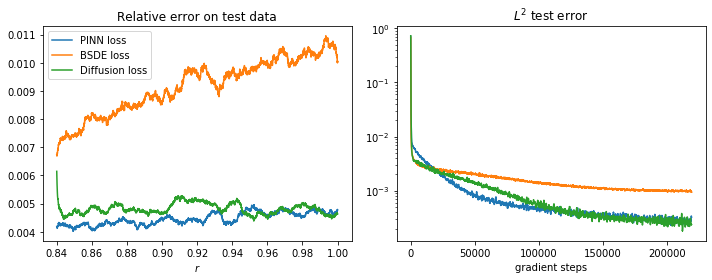

In [23]:
models_pinn[2].name = 'PINN loss'
models_bsde[0].name = 'BSDE loss'
models_diffusion[0].name = 'Diffusion loss'

moving_span = 500

K = 10000
X = pt.randn(K, problem.d).to(device)
X = problem.boundary_distance * X / pt.sqrt(pt.sum(X**2, 1)).unsqueeze(1) * (pt.rand(K).unsqueeze(1)**(1 / problem.d)).to(device)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for i, model in enumerate(models_pinn[2:3] + models_bsde[0:1] + models_diffusion[0:1]):

    rel_errors = (pt.abs(model.V(X).squeeze() - problem.v_true(X)) / problem.v_true(X)).detach().cpu().numpy()
    rs = pt.sqrt(pt.sum(X**2, 1)).cpu().numpy()
    rs_inds = rs.argsort()
    sorted_rel_errors = rel_errors[rs_inds]
    sorted_rs = rs[rs_inds]
    ax[0].plot(np.linspace(min(sorted_rs), max(sorted_rs), len(sorted_rs) - moving_span), [np.mean(sorted_rel_errors[i:i + moving_span]) for i in range(len(sorted_rel_errors) - moving_span)], label=model.name)
    
    ax[1].plot([np.mean(model.V_test_L2[i:i + moving_span]) for i in range(len(model.V_test_L2) - moving_span)], label=model.name)
    
ax[0].legend();

ax[0].set_xlabel(r'$r$')
ax[0].set_title(r'Relative error on test data')
ax[1].set_title(r'$L^2$ test error')
ax[1].set_xlabel(r'gradient steps')
ax[1].set_yscale('log');

fig.tight_layout()

#fig.savefig('img/toy_example_elliptic_d50_2.pdf')